**IMPORT LIBRARIES**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,r2_score,recall_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
import random
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


LOAD DATASET

In [4]:
data=pd.read_csv("/content/drive/MyDrive/credit_risk_dataset.csv")
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


DATA PREPROCESSING

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<Axes: >

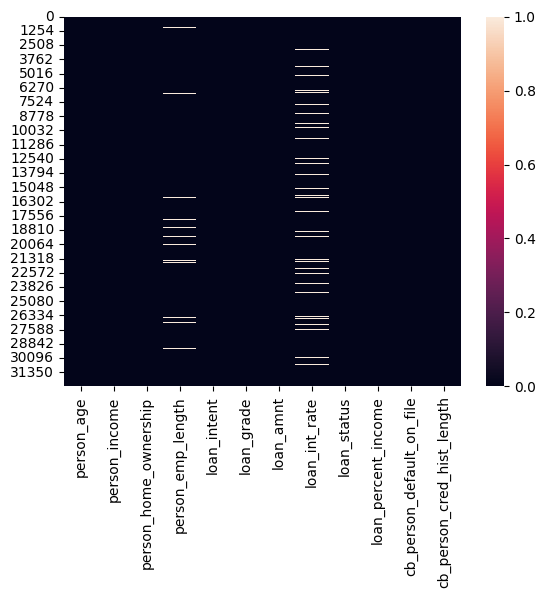

In [7]:
sns.heatmap(data.isnull())

In [8]:
print(data.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [9]:
print(data.dtypes)


person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


In [10]:
data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)


<ipython-input-10-38f907ddec31>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)


In [11]:
print(data.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [12]:
data['loan_int_rate'].fillna(data['loan_int_rate'].median(), inplace=True)


<ipython-input-12-980c9e71a10e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['loan_int_rate'].fillna(data['loan_int_rate'].median(), inplace=True)


<Axes: >

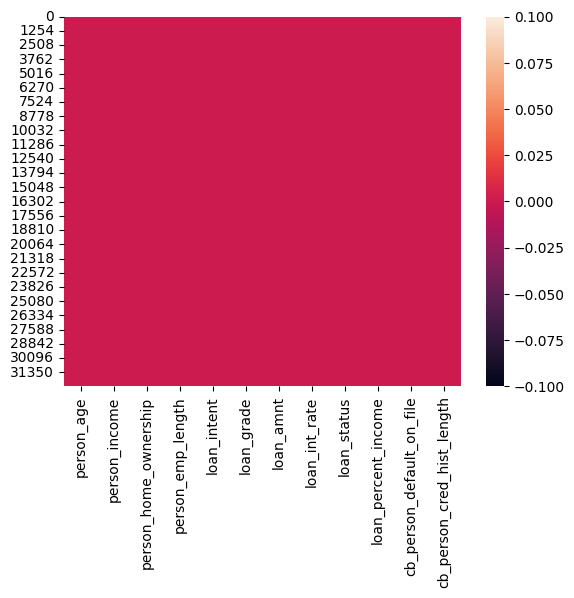

In [13]:
sns.heatmap(data.isnull())

🔍 Encode Categorical Variables

In [15]:
categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])


🧠 Feature Engineering: Income, Debt, Credit

In [16]:
# Total income (if coapplicant column existed, we would sum)
# df['total_income'] = df['person_income'] + df['coapplicant_income']

# Debt-to-income ratio
data['debt_to_income_ratio'] = data['loan_amnt'] / (data['person_income'] + 1)  # Avoid divide by zero

# Credit history length already exists → keep as is


🎯 Target Definition

In [18]:
# Convert loan_status to binary: 1 = default, 0 = not default
data['default'] = data['loan_status'].map({1: 1, 0: 0})  # if already binary, you can use directly


**Train-Test Split**

In [19]:
X = data.drop(['loan_status', 'default'], axis=1)
y = data['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


⚖️  Handle Imbalance with SMOTE

In [20]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


🤖 Train Models (XGBoost, RF, GB)

In [22]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_resampled, y_resampled)
y_pred_xgb = xgb.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_resampled, y_resampled)
y_pred_gb = gb.predict(X_test)


📊  Evaluate Models

In [24]:
def evaluate_model(y_test, y_pred, name):
    print(f"\n📌 Model: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")



📌 Model: XGBoost
[[4959  113]
 [ 350 1095]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5072
           1       0.91      0.76      0.83      1445

    accuracy                           0.93      6517
   macro avg       0.92      0.87      0.89      6517
weighted avg       0.93      0.93      0.93      6517

ROC-AUC Score: 0.8677531436586509

📌 Model: Random Forest
[[4784  288]
 [ 349 1096]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5072
           1       0.79      0.76      0.77      1445

    accuracy                           0.90      6517
   macro avg       0.86      0.85      0.86      6517
weighted avg       0.90      0.90      0.90      6517

ROC-AUC Score: 0.8508475871328305

📌 Model: Gradient Boosting
[[4712  360]
 [ 373 1072]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5072
           1      

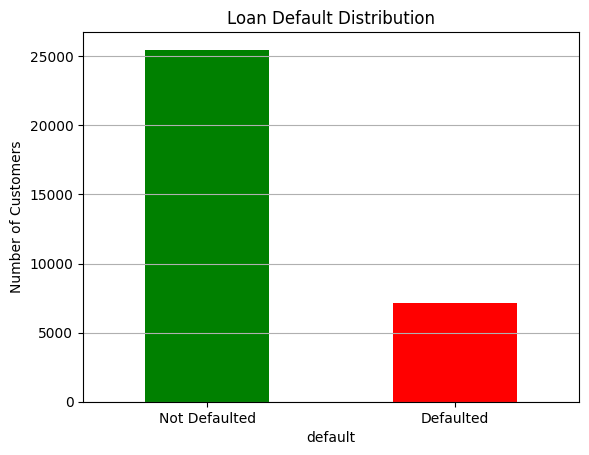

In [25]:
# Loan default count plot
data['default'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Loan Default Distribution")
plt.xticks(ticks=[0,1], labels=['Not Defaulted', 'Defaulted'], rotation=0)
plt.ylabel("Number of Customers")
plt.grid(axis='y')
plt.show()


<ipython-input-28-1a1c60170162>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y='loan_amnt', data=data, palette='Set2')


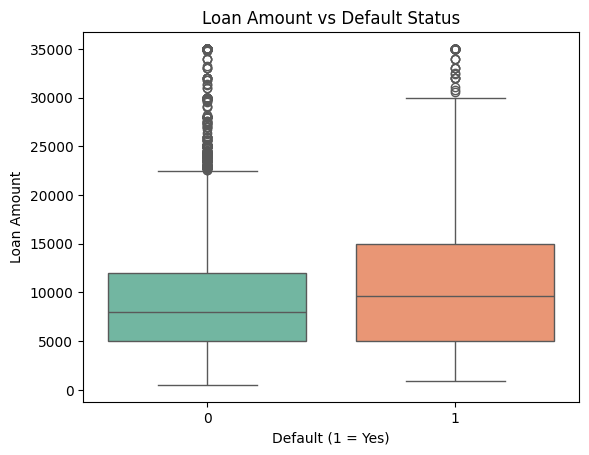

In [28]:
sns.boxplot(x='default', y='loan_amnt', data=data, palette='Set2')
plt.title("Loan Amount vs Default Status")
plt.xlabel("Default (1 = Yes)")
plt.ylabel("Loan Amount")
plt.show()


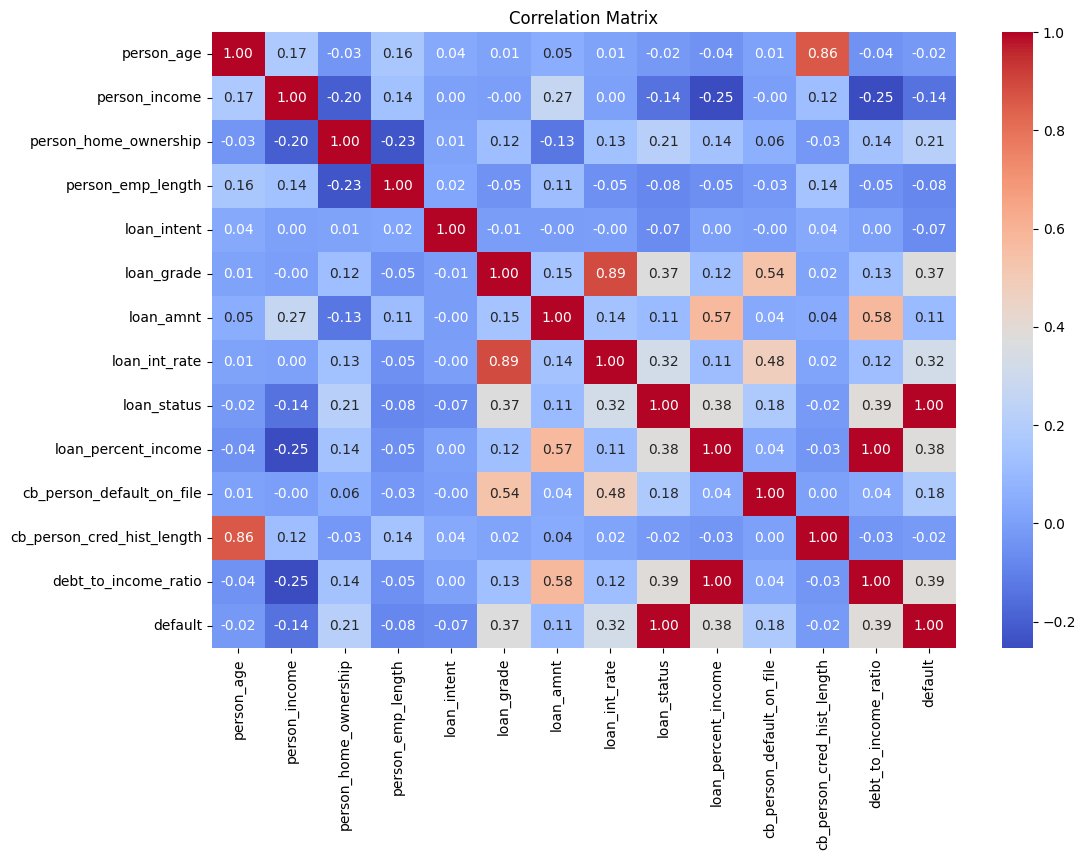

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


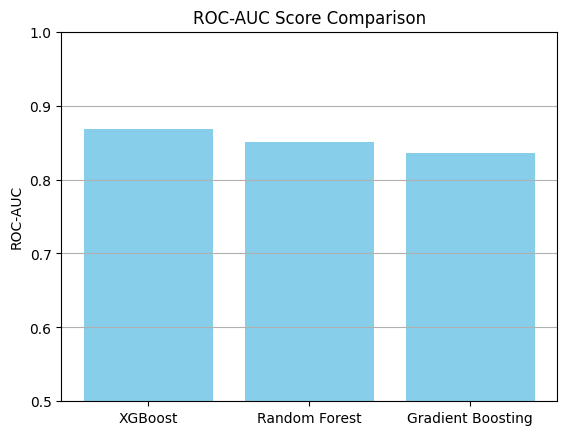

In [31]:
models = ['XGBoost', 'Random Forest', 'Gradient Boosting']
scores = [
    roc_auc_score(y_test, y_pred_xgb),
    roc_auc_score(y_test, y_pred_rf),
    roc_auc_score(y_test, y_pred_gb)
]

plt.bar(models, scores, color='skyblue')
plt.title("ROC-AUC Score Comparison")
plt.ylabel("ROC-AUC")
plt.ylim(0.5, 1.0)
plt.grid(axis='y')
plt.show()


In [32]:
import joblib
joblib.dump(xgb, "credit_risk_model.pkl")
joblib.dump(X.columns.tolist(), "feature_names.pkl")

['feature_names.pkl']